#  Evaluation Metrics and Scoring

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [142]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                     KFold,GridSearchCV)

In [34]:
digits = load_digits()
X, y = digits['data'], digits['target']==9

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
most_freq_pred = dummy.predict(X_test)

print(f'Unique predicted values {pd.unique(pred)}')
print(f'Test score : {dummy.score(X_test, y_test):.2f}')

Unique predicted values [False]
Test score : 0.90


In [20]:
tree_clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree_clf.predict(X_test)
score = tree_clf.score(X_test, y_test)
print(f'score : {score:.2f}')

score : 0.92


In [53]:
dummy = DummyClassifier(strategy='prior').fit(X_train, y_train)
dummy_pred =dummy.predict(X_test)
dummy_score = dummy.score(X_test, y_test)

log_clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
log_pred = log_clf.predict(X_test)
log_score = log_clf.score(X_test, y_test)

print(f'dummy score : {dummy_score:.2f}')
print(f'log score : {log_score:.2f}')

dummy score : 0.90
log score : 0.98


## Confusion Matrics



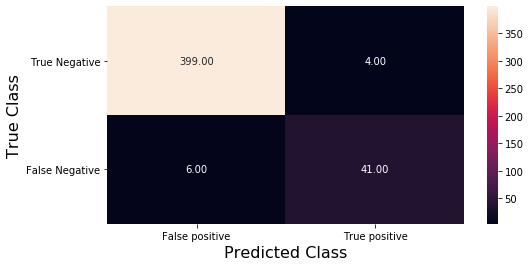

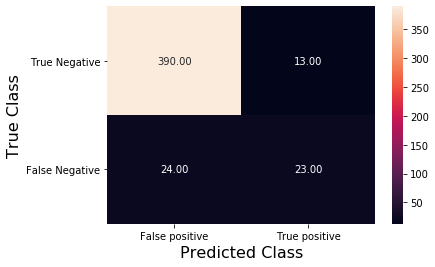

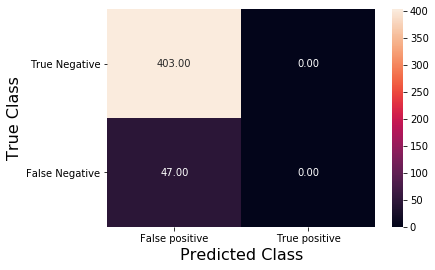

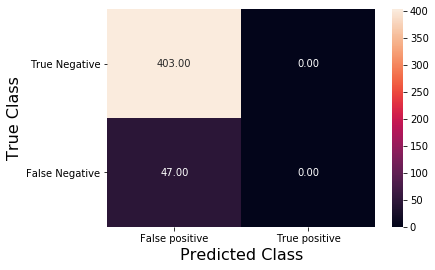

In [132]:
# confusion matrics of the logistic model
fig, ax = plt.subplots(figsize=(8,4))
for pred in [log_pred, pred_tree, dummy_pred, most_freq_pred]:
    confusion = confusion_matrix(y_test, pred)    
    sns.heatmap(confusion, annot=True, fmt='.2f',
                      xticklabels=['False positive', 'True positive'], 
                      yticklabels=['True Negative', 'False Negative'])
    plt.ylabel('True Class', fontsize=16)
    plt.xlabel('Predicted Class', fontsize=16)
    plt.yticks(rotation=0)
    plt.show()

### F1_score

In [141]:
print(f'f1 scores logistic: {f1_score(y_test, log_pred):.2f}')
print(f'f1 scores decision: {f1_score(y_test, pred_tree):.2f}')
print(f'f1 scores dummy: {f1_score(y_test, dummy_pred):.2f}')
print(f'f1 scores most frequent: {f1_score(y_test, most_freq_pred):.2f}')

f1 scores logistic: 0.89
f1 scores decision: 0.55
f1 scores dummy: 0.00
f1 scores most frequent: 0.00


In [146]:
print(classification_report(y_test, most_freq_pred, 
                            target_names=['non-nine', 'nine']))

              precision    recall  f1-score   support

    non-nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450

